# Implementing a Biased Random Forest
Learning from unbalanced classes is a problem common to many datasets. The [Biased Random Forest](https://ieeexplore.ieee.org/document/8541100) (BRAF) approach is an algorithim-level approach that aims to address the imbalance in an input data set and improve performance. A walk-through of a complete implementation is provided for a single forest. A k-fold validation (k=10) is then performed to evaluate the ensemble performance of the method

### Load data

In [1]:
from backendBRAF import *

data_raw = pd.read_csv('/home/btannenw/Desktop/life/challenges/BRAF/ML_Technical/diabetes.csv')
data_clean = cleanAndImpute( data_raw ) # impute any missing values
data_scaled = standardScaleVariables( data_clean) # scale data

### Explore data 

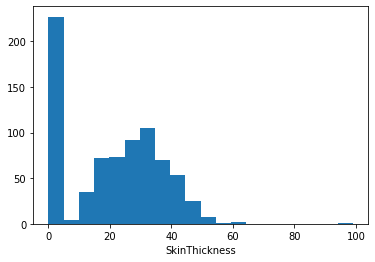

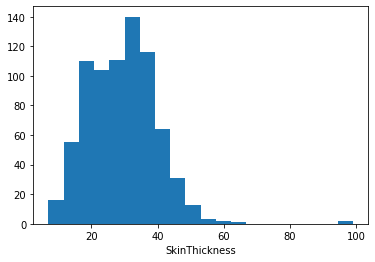

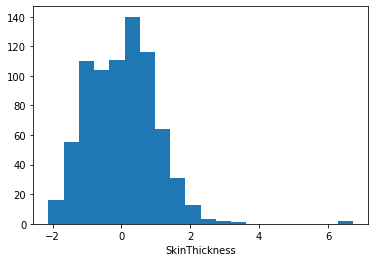

In [2]:
nBins = 20
plotVar = 'SkinThickness'

for variable in data_scaled.columns.to_list():
    if variable == plotVar:
        plotOneVariable(data_raw, variable, bins=nBins)    # first, plot raw data
        plotOneVariable(data_clean, variable, bins=nBins)  # second, plot data after imputation
        plotOneVariable(data_scaled, variable, bins=nBins) # third, plot data after scaling+imputation


### Make testing, training sets

In [3]:
# create testing and training sets
train1, test1, train0, test0 = returnTestTrainSplit(data_scaled, testingFraction=0.15)

# build training set
T = train0.copy()
T = T.append(train1.copy())
T = T.sample(frac=1.)
print("Training set: {} rows".format(len(T)))

# build testing set
T_test = test0.copy()
T_test = T_test.append(test1.copy())
T_test = T_test.sample(frac=1.)
print("Testing set: {} rows".format(len(T_test)))

268 227 227 41
500 425 425 75
Training set: 652 rows
Testing set: 116 rows


### Make critical set

In [4]:
kNN = 10 # k-nearest neighbors parameter

Tc = buildCriticalSet(train0, train1, kNN)
print("Critial set: {} rows".format(len(Tc)))

Critial set: 493 rows


### Train A Single Random Forest

In [5]:
s = 100 # forest size
p = 0.5 # forest fraction trained on critical set

nominalTrees = int(s*(1-p))
criticalTrees = s - nominalTrees
print("Nominal trees: {}, Critical Trees: {}".format(nominalTrees, criticalTrees))

nominal_forest = trainRandomForest( T, max_depth=3, min_size=10, nTrees=nominalTrees, name='Nominal')
critical_forest = trainRandomForest( Tc, max_depth=3, min_size=10, nTrees=criticalTrees, name='Critical')

Nominal trees: 50, Critical Trees: 50
Training Nominal Forest
Training Critical Forest


### Evaluate/Compare Results over Forest Subsets

In [6]:
# nominal training set performance
evaluateForest( 'Nominal', nominal_forest, T_test)

# critical training set performance
evaluateForest( 'Critical', critical_forest, T_test)

# combined performance
combined_forest = nominal_forest + critical_forest
a,p,c = evaluateForest( 'Combined', combined_forest, T_test)

### Visualize Forest Predictions

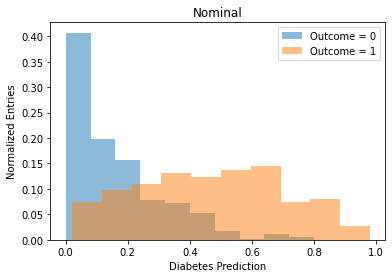

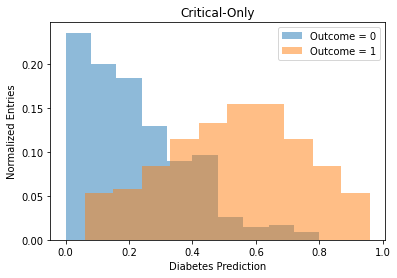

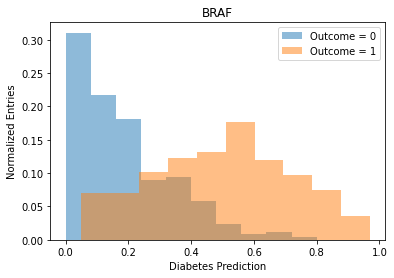

In [7]:
T_pred_0 = makeBaggingPredictions( T, nominal_forest)
T_pred_1 = makeBaggingPredictions( T, critical_forest)
T_pred_2 = makeBaggingPredictions( T, nominal_forest+critical_forest )

drawPredictionPlot( T_pred_0, 'Nominal', saveDir='.')
drawPredictionPlot( T_pred_1, 'Critical-Only', saveDir='.')
drawPredictionPlot( T_pred_2, 'BRAF', saveDir='.')

### ROC Curves

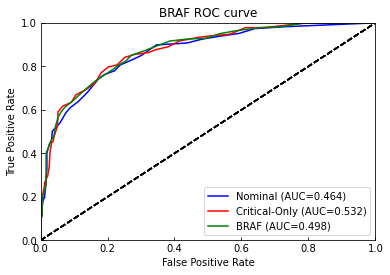

In [8]:
a1 = plotROC('Nominal', T_pred_0, 'blue')
a2 = plotROC('Critical-Only', T_pred_1, 'red')
a3 = plotROC('BRAF', T_pred_2, 'green')
plt.show()

### Precision-Recall Curves

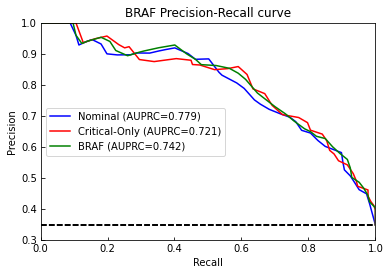

In [9]:
pr1 = plotPRC('Nominal', T_pred_0, 'blue')
pr2 = plotPRC('Critical-Only', T_pred_1, 'red')
pr3 = plotPRC('BRAF', T_pred_2, 'green')
plt.show()

# Repeat Using k-Fold Validation

======== 0th k-Fold ========
Training set: 692 rows
Testing set: 76 rows
Critial set: 514 rows
Nominal trees: 50, Critical Trees: 50
Training Nominal Forest
Training Critical Forest


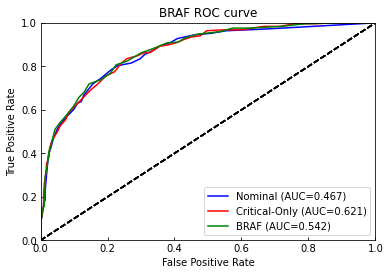

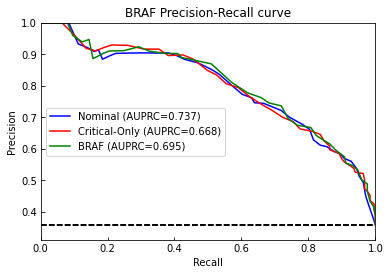

[BRAF] Train- Accuracy: 80.20%, Recall: 59.04%, Precision: 80.77%, , AUROC: 0.542, AUPRC: 0.695
[BRAF] Test-  Accuracy: 84.21%, Recall: 57.89%, Precision: 73.33%, , AUROC: 0.488, AUPRC: 0.377
======== 1th k-Fold ========
Training set: 691 rows
Testing set: 77 rows
Critial set: 523 rows
Nominal trees: 50, Critical Trees: 50
Training Nominal Forest
Training Critical Forest


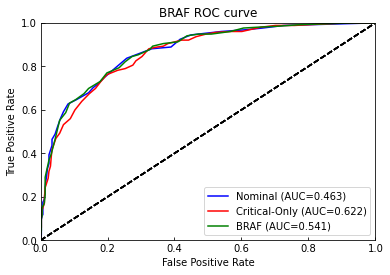

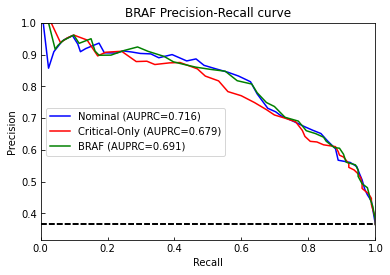

[BRAF] Train- Accuracy: 80.61%, Recall: 60.32%, Precision: 81.72%, , AUROC: 0.541, AUPRC: 0.691
[BRAF] Test-  Accuracy: 79.22%, Recall: 56.25%, Precision: 50.00%, , AUROC: 0.534, AUPRC: 0.374
======== 2th k-Fold ========
Training set: 691 rows
Testing set: 77 rows
Critial set: 508 rows
Nominal trees: 50, Critical Trees: 50
Training Nominal Forest
Training Critical Forest


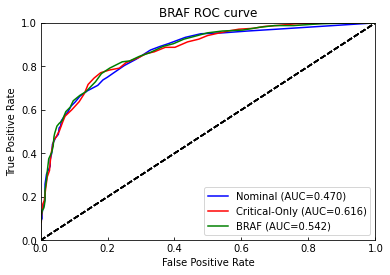

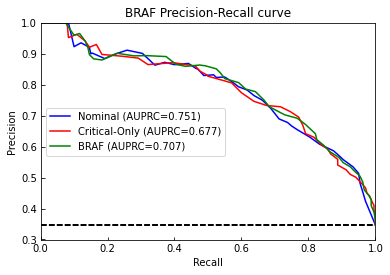

[BRAF] Train- Accuracy: 80.46%, Recall: 56.25%, Precision: 81.82%, , AUROC: 0.542, AUPRC: 0.707
[BRAF] Test-  Accuracy: 77.92%, Recall: 46.43%, Precision: 86.67%, , AUROC: 0.450, AUPRC: 0.582
======== 3th k-Fold ========
Training set: 691 rows
Testing set: 77 rows
Critial set: 526 rows
Nominal trees: 50, Critical Trees: 50
Training Nominal Forest
Training Critical Forest


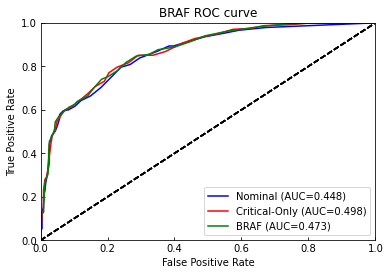

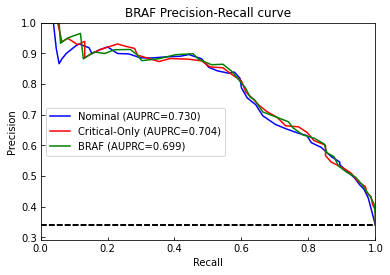

[BRAF] Train- Accuracy: 80.32%, Recall: 48.94%, Precision: 87.79%, , AUROC: 0.473, AUPRC: 0.699
[BRAF] Test-  Accuracy: 64.94%, Recall: 30.30%, Precision: 71.43%, , AUROC: 0.433, AUPRC: 0.641
======== 4th k-Fold ========
Training set: 691 rows
Testing set: 77 rows
Critial set: 520 rows
Nominal trees: 50, Critical Trees: 50
Training Nominal Forest
Training Critical Forest


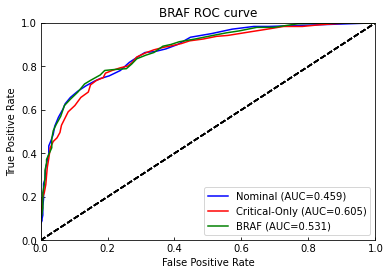

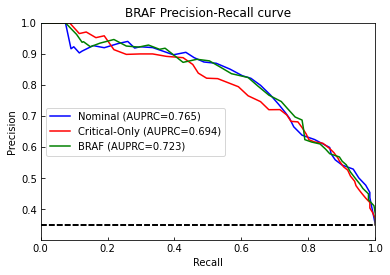

[BRAF] Train- Accuracy: 81.62%, Recall: 59.09%, Precision: 83.63%, , AUROC: 0.531, AUPRC: 0.723
[BRAF] Test-  Accuracy: 74.03%, Recall: 46.15%, Precision: 66.67%, , AUROC: 0.478, AUPRC: 0.528
======== 5th k-Fold ========
Training set: 692 rows
Testing set: 76 rows
Critial set: 518 rows
Nominal trees: 50, Critical Trees: 50
Training Nominal Forest
Training Critical Forest


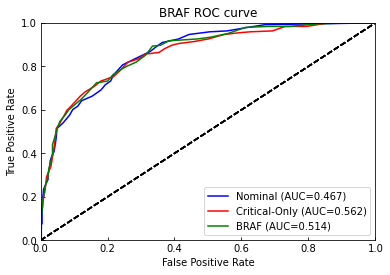

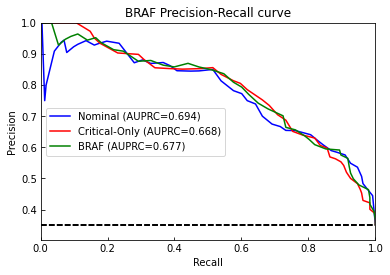

[BRAF] Train- Accuracy: 80.20%, Recall: 55.14%, Precision: 82.72%, , AUROC: 0.514, AUPRC: 0.677
[BRAF] Test-  Accuracy: 81.58%, Recall: 52.00%, Precision: 86.67%, , AUROC: 0.494, AUPRC: 0.564
======== 6th k-Fold ========
Training set: 691 rows
Testing set: 77 rows
Critial set: 502 rows
Nominal trees: 50, Critical Trees: 50
Training Nominal Forest
Training Critical Forest


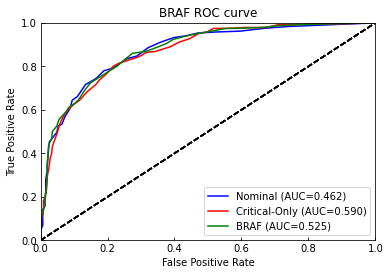

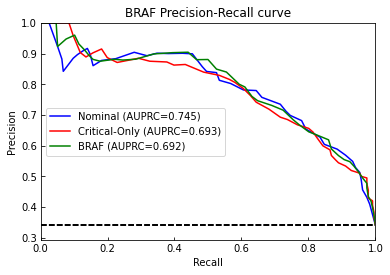

[BRAF] Train- Accuracy: 81.04%, Recall: 57.20%, Precision: 81.82%, , AUROC: 0.525, AUPRC: 0.692
[BRAF] Test-  Accuracy: 72.73%, Recall: 46.88%, Precision: 78.95%, , AUROC: 0.465, AUPRC: 0.662
======== 7th k-Fold ========
Training set: 691 rows
Testing set: 77 rows
Critial set: 519 rows
Nominal trees: 50, Critical Trees: 50
Training Nominal Forest
Training Critical Forest


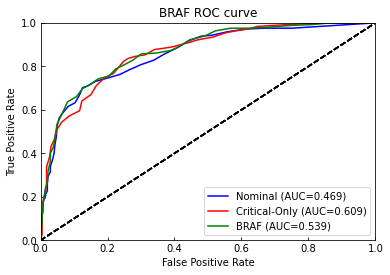

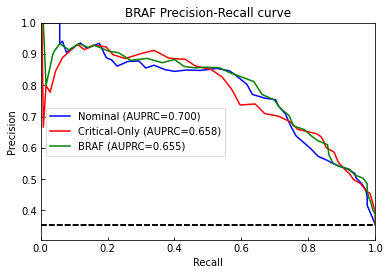

[BRAF] Train- Accuracy: 80.75%, Recall: 57.14%, Precision: 83.33%, , AUROC: 0.539, AUPRC: 0.655
[BRAF] Test-  Accuracy: 75.32%, Recall: 39.13%, Precision: 64.29%, , AUROC: 0.450, AUPRC: 0.532
======== 8th k-Fold ========
Training set: 691 rows
Testing set: 77 rows
Critial set: 517 rows
Nominal trees: 50, Critical Trees: 50
Training Nominal Forest
Training Critical Forest


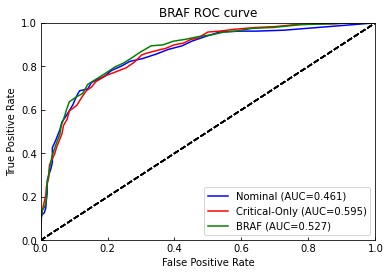

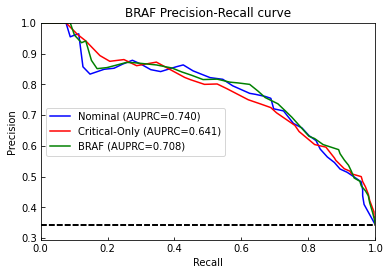

[BRAF] Train- Accuracy: 80.90%, Recall: 57.81%, Precision: 81.07%, , AUROC: 0.527, AUPRC: 0.708
[BRAF] Test-  Accuracy: 77.92%, Recall: 58.06%, Precision: 81.82%, , AUROC: 0.516, AUPRC: 0.632
======== 9th k-Fold ========
Training set: 691 rows
Testing set: 77 rows
Critial set: 511 rows
Nominal trees: 50, Critical Trees: 50
Training Nominal Forest
Training Critical Forest


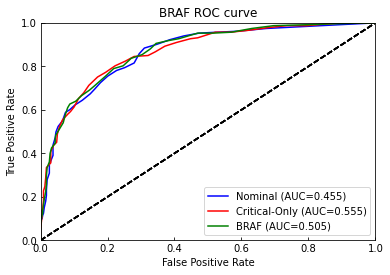

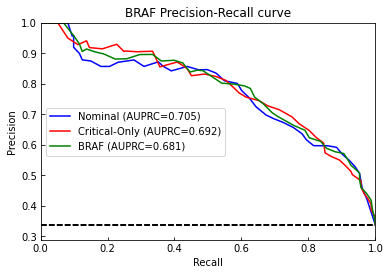

[BRAF] Train- Accuracy: 79.31%, Recall: 49.79%, Precision: 81.69%, , AUROC: 0.505, AUPRC: 0.681
[BRAF] Test-  Accuracy: 74.03%, Recall: 57.14%, Precision: 80.00%, , AUROC: 0.497, AUPRC: 0.680


In [10]:
nFolds = 10
kNN = 10 # k-nearest neighbors parameter
s = 100 # forest size
p = 0.5 # forest fraction trained on critical set

data_scaled = data_scaled.sample(frac=1., replace=False)
folds = [ data_scaled[ int((f/nFolds)*len(data_scaled)) : int(((f+1)/nFolds)*len(data_scaled))] for f in range(0,nFolds)]
results = kfoldResultsDict()

for iFold in np.arange(0, nFolds):
    
    print("======== {}th k-Fold ========".format(iFold))

    # *** 0. Initialize each iteration
    T_test = folds[iFold]
    T = None
    Tc = None
    
    # *** 1. Create n-1 fold for training
    for jFold in np.arange(0, len(folds)):
        # skip fold held apart for testing
        if iFold == jFold:
            continue
            
        # set T if first training fold
        if T is None:
            T = folds[jFold]
        else: # append folds to existing set
            T = T.append(folds[jFold])
    print("Training set: {} rows".format(len(T)))
    print("Testing set: {} rows".format(len(T_test)))
    
    # *** 2. Create critical set
    Tc = buildCriticalSet( T[ T.Outcome==0], T[ T.Outcome==1], kNN)
    print("Critial set: {} rows".format(len(Tc)))
    
    # *** 3. Create and train forest
    nominalTrees = int(s*(1-p))
    criticalTrees = s - nominalTrees
    print("Nominal trees: {}, Critical Trees: {}".format(nominalTrees, criticalTrees))

    nominal_forest = trainRandomForest( T, max_depth=3, min_size=10, nTrees=nominalTrees, name='Nominal')
    critical_forest = trainRandomForest( Tc, max_depth=3, min_size=10, nTrees=criticalTrees, name='Critical')

    # *** 4. Evaluate and store simple quantites
    # training set
    acc_nom, prec_nom, rec_nom = evaluateForest('Nominal-Only', nominal_forest, T)
    acc_crit, prec_crit, rec_crit = evaluateForest('Critical-Only', critical_forest, T)
    acc_braf, prec_braf, rec_braf = evaluateForest('BRAF', (nominal_forest + critical_forest), T)
    # testing set
    acc_nom_t, prec_nom_t, rec_nom_t = evaluateForest('Nominal-Only', nominal_forest, T_test)
    acc_crit_t, prec_crit_t, rec_crit_t = evaluateForest('Critical-Only', critical_forest, T_test)
    acc_braf_t, prec_braf_t, rec_braf_t = evaluateForest('BRAF', (nominal_forest + critical_forest), T_test)

    # *** 5. Store predictions for AUC/ AUPRC
    Tt_pred_nom  = makeBaggingPredictions( T_test, nominal_forest)
    Tt_pred_crit = makeBaggingPredictions( T_test, critical_forest)
    Tt_pred_braf = makeBaggingPredictions( T_test, (nominal_forest + critical_forest) )

    T_pred_nom  = makeBaggingPredictions( T, nominal_forest)
    T_pred_crit = makeBaggingPredictions( T, critical_forest)
    T_pred_braf = makeBaggingPredictions( T, (nominal_forest + critical_forest) )

    # *** 6A. Make AUROC comparison plot (train)
    auc_nom, auc_crit, auc_braf = compareCurves( T_pred_nom, T_pred_crit, T_pred_braf, iFold, 'AUC', name='train')
    
    # *** 6B. Make AUROC comparison plot (test)
    auc_nom_t, auc_crit_t, auc_braf_t = compareCurves( Tt_pred_nom, Tt_pred_crit, Tt_pred_braf, iFold, 'AUC', name='test')

    # *** 7A. Make AUPRC comparison plot (train)
    auprc_nom, auprc_crit, auprc_braf = compareCurves( T_pred_nom, T_pred_crit, T_pred_braf, iFold, 'AUPRC', name='train')
    
    # *** 7B. Make AUPRC comparison plot (test)
    auprc_nom_t, auprc_crit_t, auprc_braf_t = compareCurves( Tt_pred_nom, Tt_pred_crit, Tt_pred_braf, iFold, 'AUPRC', name='test')

    # *** 8. Store results
    storeFoldResults(results, 'nominal', acc_nom_t, prec_nom_t, rec_nom_t, auc_nom_t, auprc_nom_t, iFold) # nominal-only
    storeFoldResults(results, 'critical', acc_crit_t, prec_crit_t, rec_crit_t, auc_crit_t, auprc_crit_t, iFold) # critical-only
    storeFoldResults(results, 'BRAF', acc_braf_t, prec_braf_t, rec_braf_t, auc_braf_t, auprc_braf_t, iFold) # BRAF-only
    storeFoldResults(results, 'nominal_train', acc_nom, prec_nom, rec_nom, auc_nom, auprc_nom, iFold) # nominal-only
    storeFoldResults(results, 'critical_train', acc_crit, prec_crit, rec_crit, auc_crit, auprc_crit, iFold) # critical-only
    storeFoldResults(results, 'BRAF_train', acc_braf, prec_braf, rec_braf, auc_braf, auprc_braf, iFold) # BRAF-only
    
    # *** 9. Quick Print
    print("[BRAF] Train- Accuracy: {:.2f}%, Recall: {:.2f}%, Precision: {:.2f}%, , AUROC: {:.3f}, AUPRC: {:.3f}".format(acc_braf, rec_braf, prec_braf, auc_braf, auprc_braf))
    print("[BRAF] Test-  Accuracy: {:.2f}%, Recall: {:.2f}%, Precision: {:.2f}%, , AUROC: {:.3f}, AUPRC: {:.3f}".format(acc_braf_t, rec_braf_t, prec_braf_t, auc_braf_t, auprc_braf_t))

### Compare Performance across k-Folds

In [12]:
compareAcrossFolds(results, 'accuracy')
compareAcrossFolds(results, 'recall')
compareAcrossFolds(results, 'auc')

accuracy (nominal_train): 78.26 +/- 0.79
accuracy (critical_train): 79.98 +/- 0.74
accuracy (BRAF_train): 80.54 +/- 0.58
accuracy (nominal): 74.10 +/- 5.15
accuracy (critical): 74.36 +/- 3.99
accuracy (BRAF): 76.19 +/- 5.07
recall (nominal_train): 44.16 +/- 1.24
recall (critical_train): 66.30 +/- 7.10
recall (BRAF_train): 56.07 +/- 3.64
recall (nominal): 36.01 +/- 8.19
recall (critical): 56.25 +/- 8.91
recall (BRAF): 49.02 +/- 8.69
auc (nominal_train): 0.46 +/- 0.01
auc (critical_train): 0.59 +/- 0.04
auc (BRAF_train): 0.52 +/- 0.02
auc (nominal): 0.42 +/- 0.04
auc (critical): 0.54 +/- 0.04
auc (BRAF): 0.48 +/- 0.03


# Conclusions
The BRAF method does improve performance compared to a nominal training set without up-sampling of the critical points. The gain in improvement using the BRAF forest over a nominal forest when training on the Pima Diabetes dataset is statistically significant though not exceptionally large. This however could be due to the intrinsic differences between  classes in the dataset rather than a shortfall of the method; the authors note different performances for different data shapes in their original paper. 

#### Sources:
- https://ieeexplore.ieee.org/document/8541100

- Pandas User Manual: https://pandas.pydata.org/docs/user_guide/index.html

- https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/

- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

- https://stackoverflow.com/questions/17821458/random-number-from-histogram